# Лабораторная работа №9. Кластеризация.

__Цель лабораторной работы__: научится производить кластерный анализ
данных на основе метода К-средних.

# Методика выполения работы

1. Подберите набор данных на ресурсах [5-7] и согласуйте свой выбор с
преподавателем. Студент может предложить синтезированный набор данных.

2. Постройте модель кластеризации (K-Means) с использованием.
Проанализируйте кривые аппроксимации при различных степенях полинома.

In [ ]:
# Подключение библиотек
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
## Загрузка данных
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
X = dataset.iloc[:, [3, 4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

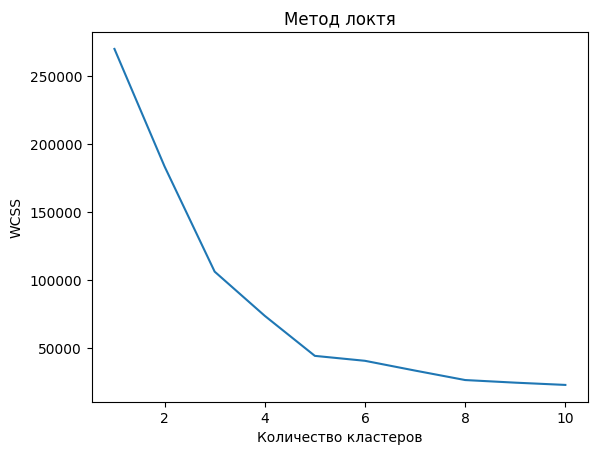

In [ ]:
# Определение оптимального количества кластеров
# Использование elbow method для поиска оптимального количества кластеров
from sklearn.cluster import KMeans
# Within Clusters Sum of Squares (WCSS)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.show()

In [5]:
# Обучение модели кластеризации для оптимального количества кластеров
# Training the K-Means model on the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

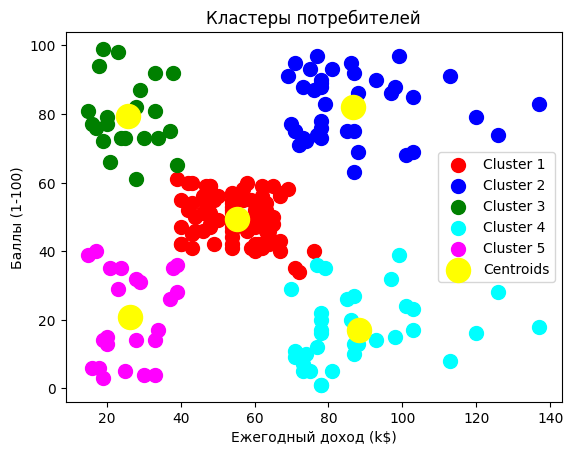

In [ ]:
# Визуализация результатов
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Кластеры потребителей')
plt.xlabel('Ежегодный доход (k$)')
plt.ylabel('Баллы (1-100)')
plt.legend()
plt.show()

## Контрольные вопросы

1. Что такое кластерный анализ?
    
    Кластерный анализ, также известный как анализ неконтролируемого обучения, представляет собой метод машинного обучения, который используется для группировки объектов данных на основе их сходства. Цель кластеризации -  выявить структуру в данных без предварительных меток или категорий.

2. Перечислите известные методы кластерного анализа.
    
    Существует множество различных методов кластеризации, каждый со своими преимуществами и недостатками. Вот некоторые из наиболее распространенных:
    - K-means: Один из самых популярных методов, который делит данные на заданное количество кластеров, минимизируя расстояние между точками данных в каждом кластере.
    - Иерархическая кластеризация: Создает иерархию кластеров, последовательно объединяя или разделяя точки данных на основе их сходства.
    - Метод DBSCAN: Группирует точки данных в плотные области, называемые кластерами, отделяя их от шума.
    - Анализ на основе плотности: Определяет кластеры как области высокой плотности точек данных, окруженные областями низкой плотности.

3. Перечислите классы и функции Python, которые задействованы при
реализации кластерного анализа.

    Библиотека scikit-learn в Python предоставляет множество модулей и функций для реализации кластерного анализа. Вот некоторые из наиболее часто используемых:

    - Модуль sklearn.cluster: Содержит классы для реализации различных алгоритмов кластеризации, таких как KMeans, DBSCAN и HierarchicalClustering.
    - Функция pairwise_distances: Вычисляет матрицу расстояний между всеми парами точек данных.
    - Функция dendrogram: Создает дендрограмму для визуализации иерархической кластеризации.
    - Модуль matplotlib: Используется для визуализации результатов кластеризации, таких как рассеянные диаграммы и дендрограммы.

4. Опишите принцип определения оптимального количества кластеров.

    Не существует универсального метода определения оптимального количества кластеров для набора данных.

    Методы оценки метрик:
    - Silhouette Score: Средняя разница между расстоянием точки данных до центра своего кластера и расстоянием до ближайшего соседнего кластера.
    - Calinski-Harabasz Index: Мера, которая учитывает как внутрикластерное, так и межкластерное расстояние.
    
    Визуализация:
    - Построение графиков кластеров с различным количеством кластеров может помочь визуально оценить оптимальное число.
    
    Анализ доменных знаний:
    - Эксперты в предметной области могут иметь знания о естественном количестве групп в данных.

5. Опишите принципиальные отличия методов регрессии, кластеризации
и классификации.

    Регрессия:
    - Прогнозирует непрерывное значение целевой переменной на основе набора входных переменных.
    - Используется для задач, где необходимо предсказать числовое значение, например, цену дома или спрос на продукт.
    
    Кластеризация:
    - Группирует объекты данных на основе их сходства без предварительных меток или категорий.
    - Используется для задач неконтролируемого обучения, где структура данных не известна заранее.
    
    Классификация:
    - Определяет категорию, к которой принадлежит объект данных.
    - Используется для задач обучения с учителем, где данные имеют предопределенные метки категорий.